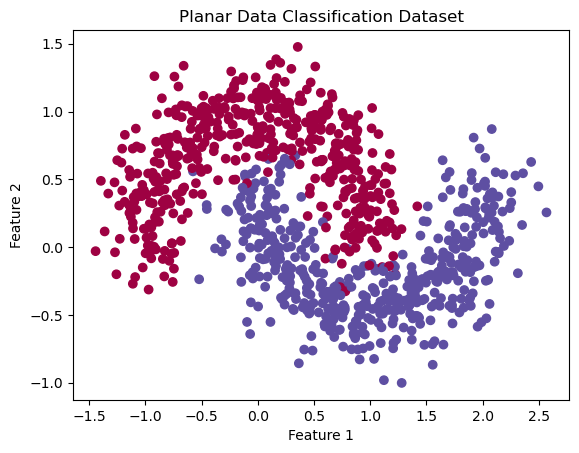

Epoch 0, Loss: 0.6931183756999895
Epoch 100, Loss: 0.292233288084323
Epoch 200, Loss: 0.290345595086494
Epoch 300, Loss: 0.28940459154948095
Epoch 400, Loss: 0.2888583230503314
Epoch 500, Loss: 0.2884965265988919
Epoch 600, Loss: 0.28823276743958853
Epoch 700, Loss: 0.2880277848707205
Epoch 800, Loss: 0.287861677304732
Epoch 900, Loss: 0.28772319048116163


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize parameters
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01
        self.b2 = np.zeros((output_size, 1))

    def forward_propagation(self, X):
        # Forward pass
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = np.tanh(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    def backward_propagation(self, X, Y):
        m = X.shape[1]  # Number of samples

        # Backward pass
        dZ2 = self.A2 - Y
        dW2 = (1 / m) * np.dot(dZ2, self.A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(self.W2.T, dZ2) * (1 - np.power(self.A1, 2))  # derivative of tanh
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

        # Update parameters
        self.W2 -= dW2
        self.b2 -= db2
        self.W1 -= dW1
        self.b1 -= db1

    def train(self, X, Y, num_epochs, learning_rate):
        for epoch in range(num_epochs):
            # Forward propagation
            predictions = self.forward_propagation(X)

            # Compute cross-entropy loss
            loss = self.cross_entropy_loss(Y, predictions)

            # Backward propagation
            self.backward_propagation(X, Y)

            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def cross_entropy_loss(self, Y, A):
        m = Y.shape[1]  # Number of samples
        return -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

# Load and preprocess the data
X, Y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = X.T
Y = Y.reshape(1, -1)

# Plot the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Planar Data Classification Dataset')
plt.show()

# Example usage
input_size = 2
hidden_size = 4
output_size = 1

model = NeuralNetwork(input_size, hidden_size, output_size)
model.train(X, Y, num_epochs=1000, learning_rate=0.01)